In [1]:
from unityagents import UnityEnvironment
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")
#env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environmentll
print('Number of agents:', len(env_info.agents))


Number of agents: 1


In [3]:
# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Deep Q-Learning Implementation

In [4]:
from dqn_agent import Agent
from collections import deque
import torch
import numpy as np
 
# Hyperparameters
BUFFER_SIZE = 10000  # replay buffer size
BATCH_SIZE = 64       # minibatch size
GAMMA = 0.99          # discount factor
TAU = 1e-3           # for soft update of target parameters
LR = 1e-4            # learning rate    
UPDATE_EVERY = 1     # how often to update the network

# Initialize agent
seed = 0
agent = Agent(state_size, action_size, BUFFER_SIZE, BATCH_SIZE, LR, GAMMA, TAU, UPDATE_EVERY, seed)

# Initialize other parameters
T = 1000                            # maximum number of time steps per episode
scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
mean_scores = []                # list containing mean scores from each episode
eps = 1.0                          # initialize epsilon
eps_end = 0.01                    # minimum epsilon
eps_decay = 0.995                 # decay rate for epsilon

num_episodes = 2000

# Loop over episodes
for i_episode in range(1, num_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]
    score = 0 
    for t in range(T):
        # Select action a_j using epsilon-greedy policy
        action = agent.act(state, eps)
        
        # Execute action and observe reward and next state
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]

        # Store experience in replay memory D, learn if enough samples are available
        agent.step(state, action, reward, next_state, done)

        state = next_state
        score += reward
        if done:
            break 

    # Save the score and update the scores window
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
    mean_scores.append(np.mean(scores_window))  # save mean score
    
    # Update epsilon
    eps = max(eps_end, eps_decay*eps)

    print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")
    if i_episode % 10 == 0:
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}')

    if np.mean(scores_window) >= 13.0:  # Check if average score is above threshold
        print(f'\nEnvironment solved in {i_episode} episodes!\tAverage Score: {np.mean(scores_window):.2f}')
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        break


Episode 10	Average Score: -0.30
Episode 20	Average Score: -0.20
Episode 30	Average Score: -0.17
Episode 40	Average Score: 0.073
Episode 50	Average Score: 0.36
Episode 60	Average Score: 0.42
Episode 70	Average Score: 0.61
Episode 80	Average Score: 0.85
Episode 90	Average Score: 1.00
Episode 100	Average Score: 1.13
Episode 110	Average Score: 1.44
Episode 120	Average Score: 1.80
Episode 130	Average Score: 2.23
Episode 140	Average Score: 2.55
Episode 150	Average Score: 2.85
Episode 160	Average Score: 3.25
Episode 170	Average Score: 3.68
Episode 180	Average Score: 3.97
Episode 190	Average Score: 4.42
Episode 200	Average Score: 4.87
Episode 210	Average Score: 5.21
Episode 220	Average Score: 5.65
Episode 230	Average Score: 6.02
Episode 240	Average Score: 6.44
Episode 250	Average Score: 6.78
Episode 260	Average Score: 7.18
Episode 270	Average Score: 7.41
Episode 280	Average Score: 7.71
Episode 290	Average Score: 7.83
Episode 300	Average Score: 8.11
Episode 310	Average Score: 8.30
Episode 320	A

[0.0, 0.0, 0.0, 1.0, 0.0, -1.0, -2.0, 0.0, 0.0, -1.0, 0.0, -2.0, -2.0, 0.0, 1.0, -2.0, 0.0, 3.0, 1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 2.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 3.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 3.0, 0.0, -1.0, 1.0, 1.0, 0.0, 2.0, 0.0, -1.0, 3.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 4.0, 0.0, 2.0, 0.0, 5.0, 4.0, 0.0, 2.0, 8.0, 2.0, 2.0, 0.0, 1.0, 0.0, 6.0, 3.0, 0.0, 2.0, -1.0, 1.0, 5.0, -2.0, 5.0, 4.0, 5.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 5.0, 4.0, 4.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 6.0, 3.0, 5.0, 5.0, 0.0, 3.0, 3.0, 4.0, 6.0, 4.0, 0.0, 4.0, 7.0, 3.0, 8.0, 3.0, 4.0, 0.0, 5.0, 1.0, 3.0, 5.0, 2.0, 3.0, 10.0, 7.0, 5.0, 5.0, 3.0, 5.0, 2.0, 7.0, 4.0, 6.0, 3.0, 5.0, 2.0, 5.0, 6.0, 5.0, 5.0, 7.0, 4.0, 5.0, 2.0, 6.0, 4.0, 5.0, 3.0, 9.0, 12.0, 6.0, 3.0, 8.0, 1.0, 10.0, 4.0, 9.0, 4.0, 1.0, 7.0, 7.0, 8.0, 6.0, 1.0, 7.0, 3.0, 6.0, 6.0, 6.0, 10.0, 0.0, 4.0, 8.0, 10.0, 14.0, 10.0, 7.0, 10.0, 5.0, 3.0, 1

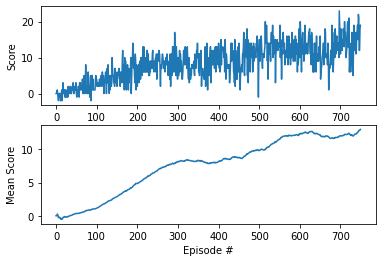

In [ ]:
import matplotlib.pyplot as plt
import json
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(211)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
fig.add_subplot(212)
plt.plot(np.arange(len(mean_scores)), mean_scores)
plt.ylabel('Mean Score')
plt.xlabel('Episode #')
plt.show()


# Save the scores and parameters to a JSON file
data = {
    'BUFFER_SIZE': BUFFER_SIZE,
    'BATCH_SIZE': BATCH_SIZE,
    'GAMMA': GAMMA,
    'TAU': TAU,
    'LR': LR,
    'scores': scores,
    'mean_scores': mean_scores
}

with open('training_scores.json', 'w') as f:
    json.dump(data, f)


In [6]:
env.close()